# Analysis of ESGU's Investment Trends
### Ziqi Lin
### November 30, 2023

## Introduction

The dataset I used in this analysis is a collection of daily data for the iShares ESG Aware MSCI USA ETF (ESGU) for the past 5 years. ESGU is an iShares fund which is powered by the expert portfolio and risk management of BlackRock. It is designed to track the investment results of an index consisting of American companies with positive environmental, social, and governance (ESG) characteristics while exhibiting similar risk and return characteristics as the parent index. 

I studied both Economics and Data Science during my undergraduate study, cultivating strong interests and habits of reading news in the financial market and seizing market trends from available data and information. Analyzing price movements and trading volume of the ETF sector can obtain insights into market trends and investor sentiment in the entire financial market since ETFs are diversified portfolios of a wide range of assets. More importantly, ESG investing has gained remarkable prominence in recent years as investors increasingly seek socially responsible options for sustainable investments. Recognizing the significance of these trends, I found the daily data of ESGU over the past five years to be an ideal dataset for exploring the long-term performance of ESG related financial products to evaluate the importance of ESG considerations in investment strategies.

In this analysis, I expect to see an increasing trend of ESGU's closing price over the past five years, which may indicate a continued confidence in the emerging ESG sector to support businesses that address public concerns about environmental issues, ethical business practices, and social impact. I also wanted to look at the performance levels of companies with strong ESG practices in the market by comparing ESGU to the benchmark S&P 500 index. In terms of investment opportunities, I would like to study the correlation between the closing price data and the volume data to investigate if there is an unusually high volume when the market sentiment reverses. Since ESG consideration has been gaining significant momentum in recent years as the increasing concern over environmental issues, such as climate change and sustainability, I have a hunch that the overall price trend of ESGU is positively increasing, indicating that investors are bullish on ESG investing. However, even though demand for ESG investments is likely to continue to increase, ESGU's performance will be volatile, with some downgrades in response to gloomy market sentiment and policy changes.

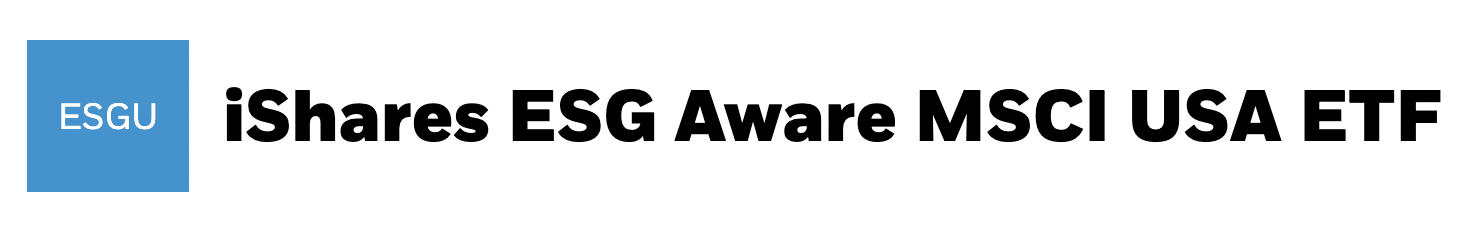

## Data Explained 

The website of ESGU can be found at https://www.blackrock.com/us/individual/products/286007/ishares-esg-aware-msci-usa-etf. The historical trading data of ESGU used in this analysis can be found at https://finance.yahoo.com/quote/ESGU/history?period1=1539561600&period2=1697328000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true.

The dataset includes daily financial data entry for the ESGU over the past 5 years from October 15th 2018 to October 13th 2023. The data cleaning process contains eliminating columns that are not needed in the original csv file, dropping nulls, renaming columns, formatting the date column, adding columns of the S&P 500 index data for benchmark comparison and creating derived columns, such as "ESGU Daily Return", from values in the existing columns.

| Column | Description | Type |
| --- | --- | --- |
| Date | Date of the row entry | object |
| ESGU Open | The first price ESGU was traded at when the market opened | float64 |
| ESGU Close | The last price ESGU was traded at when the market closed | float64 |
| ESGU Volume | Number of shares traded in a day | int64 |
| ESGU Daily Return | Investment Return of ESGU over a single trading day | float64 |
| S&P500 Close | The level of S&P 500 index when the market closed | float64 |
| Year | Year of the row entry | object |

## Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("ESGU_w_benchmark.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1234 non-null   object 
 1   ESGU Open          1234 non-null   float64
 2   ESGU Close         1234 non-null   float64
 3   ESGU Volume        1234 non-null   int64  
 4   ESGU Daily Return  1233 non-null   float64
 5   S&P500 Close       1234 non-null   float64
 6   Year               1234 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 67.6+ KB


,Date,ESGU Open,ESGU Close,ESGU Volume,ESGU Daily Return,S&P500 Close,Year
0,2018-10-15,60.509998,60.160000,3800,NaN,2750.790039,2018
1,2018-10-16,60.595001,61.459999,35600,0.0216,2809.919922,2018
2,2018-10-17,61.520000,61.278000,9400,-0.0030,2809.209961,2018
3,2018-10-18,61.172001,60.529999,2600,-0.0122,2768.780029,2018
4,2018-10-19,60.750000,60.500000,8300,-0.0005,2767.780029,2018


### Correlations

,ESGU Open,ESGU Close,ESGU Volume,S&P500 Close
ESGU Open,1.000000,0.998624,0.542711,0.994521
ESGU Close,0.998624,1.000000,0.542065,0.996011
ESGU Volume,0.542711,0.542065,1.000000,0.535076
S&P500 Close,0.994521,0.996011,0.535076,1.000000


<AxesSubplot:>

Text(0.5, 1.0, 'Heatmap ESGU data')

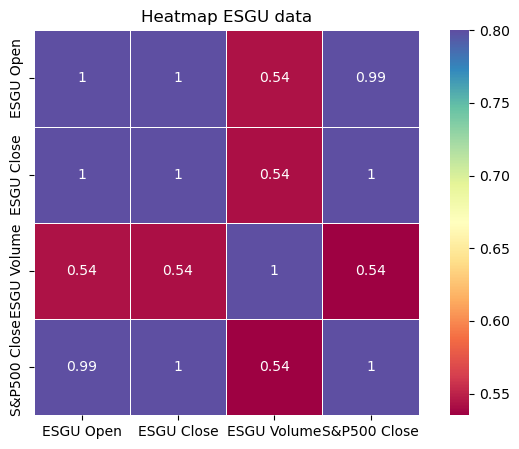

In [3]:
columns = ["ESGU Open","ESGU Close", "ESGU Volume", "S&P500 Close"]
df_corr = df[columns]
df_corr.corr()

corrmat = df_corr.corr()
f, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(corrmat, vmax = 0.8, square = True, annot = True, cmap = "Spectral", linewidths = 0.5)
plt.title("Heatmap ESGU data")
plt.show()

In looking at the heatmap above, there is a strong positive correlation (0.9960) between ESGU Close and S&P 500 Close. The two variables will be used to conduct trend analysis and benchmark comparison in the following analysis to investigate investor confidence in socially responsible investing and performance levels of companies with strong ESG practices in the market.

There is also a strong positive correlation (0.998625) between ESGU Open and ESGU Close. These two variables will be used to evaluate the price stability with intraday price movements.

There is a relatively strong relationship (0.5432) between ESGU Close and ESGU Volume. The two varibles will be used to see if swings in trading volume can be an indication of changes in the price trend.

### ESGU Trend Analysis

<Figure size 1200x600 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='ESGU Close'>

Text(0.5, 1.0, "ESGU's Closing Stock Price Over Time")

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Closing Price')

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

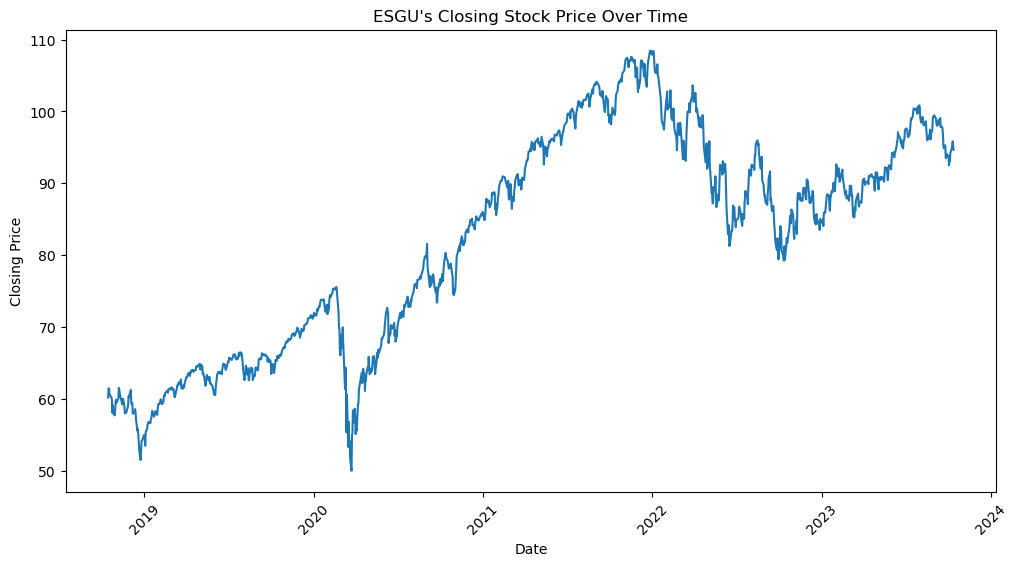

In [4]:
df["Date"] = pd.to_datetime(df["Date"])


plt.figure(figsize = (12, 6))
sns.lineplot(x = "Date", y = "ESGU Close", data = df)
plt.title("ESGU's Closing Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Use YearLocator and DateFormatter to format the x-axis
years = mdates.YearLocator()
date_format = mdates.DateFormatter("%Y")

# Apply the formatting to the x-axis
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation = 45)

plt.show()

The line plot shows that ESGU's closing prices follow an overall increasing trend over time with several relatively intense fluctuations.The 3 sharp declines happened in 12/2018 and 02/2020. There is also a continuous decrease during 01/2022 and 10/2022 with fluctuations.

<AxesSubplot:xlabel='Year', ylabel='ESGU Close'>

Text(0.5, 1.0, "ESGU's Closing Stock Prices by Year")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Closing Stock Price')

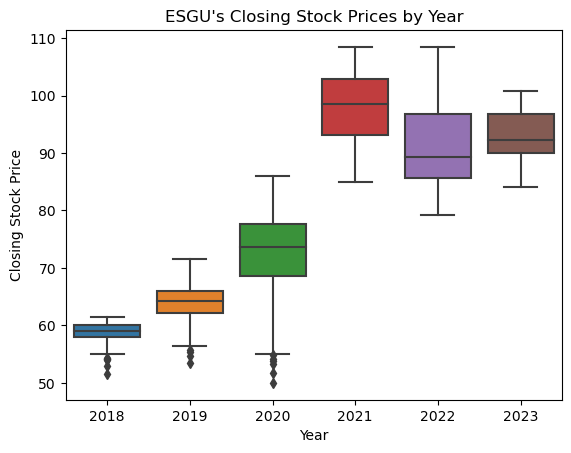

In [5]:
sns.boxplot(x = "Year", y = "ESGU Close", data = df)
plt.title("ESGU's Closing Stock Prices by Year")
plt.xlabel("Year")
plt.ylabel("Closing Stock Price")
plt.show()

Boxplots show that the closing prices have generally increased from 2018 to 2020 with some outliers and experienced a surge from 2020 to 2021. The closing prices remained at relatively the same level from 2021 to 2023 with a slight drop in 2022 and a recovery in 2023.

Through these observations, we can infer that investors have increasing confidence in ESG practices from the increasing trend in general. However, we should expect price drops when encountering ESG-related regulatory changes or a general market downturn.

### Comparison with the benchmark

By comparing the ESGU closing price trend with the trend of S&P 500 index, I continue on the previous step to see whether the price drops are due to systematic investing risks accross the whole market or unsystematic risks specific to the ESG sector.

<AxesSubplot:xlabel='Date', ylabel='ESGU Close'>

<AxesSubplot:xlabel='Date', ylabel='S&P500 Close'>

Text(0.5, 1.0, "ESGU's Closing Stock Price Over Time")

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Close Price')

Text(0.5, 1.0, 'S&P500 Closing Index Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Close')

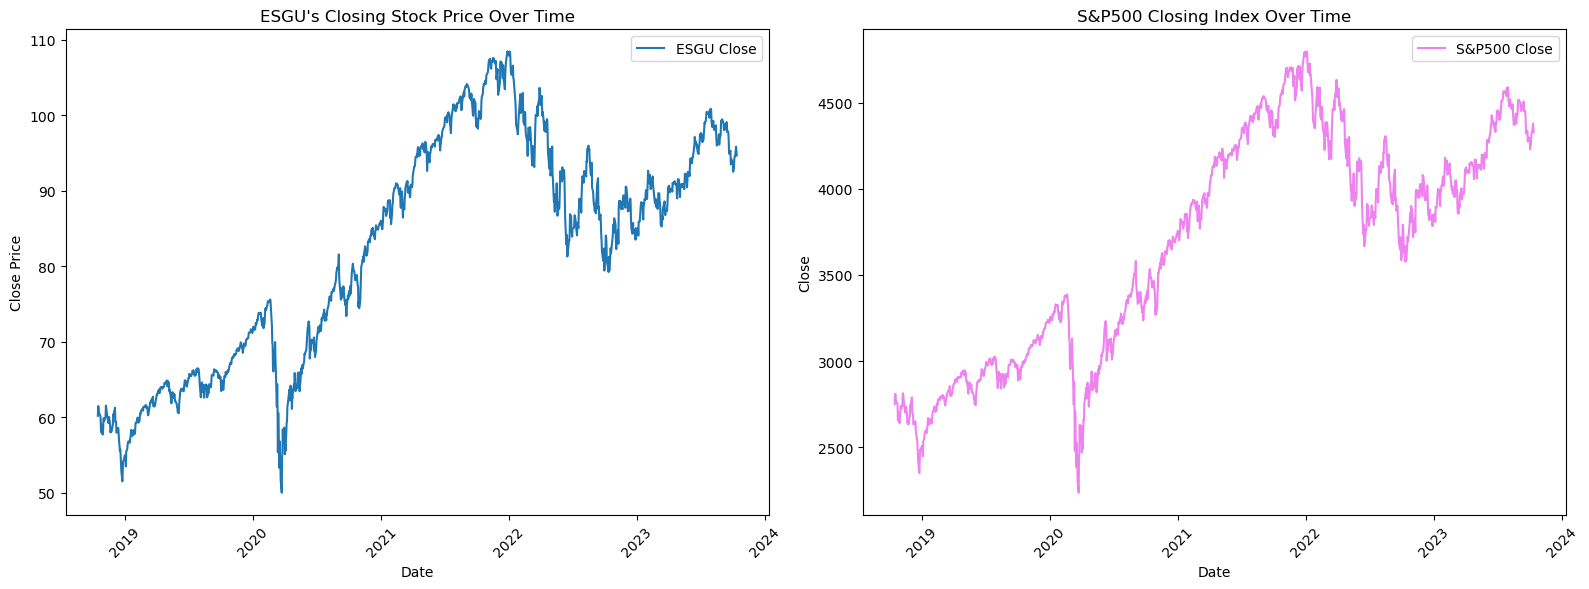

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))


sns.lineplot(x = "Date", y = "ESGU Close", data = df, label = "ESGU Close", ax = axes[0])
sns.lineplot(x = "Date", y = "S&P500 Close", data = df, label = "S&P500 Close", ax = axes[1], color = "violet")


axes[0].set_title("ESGU's Closing Stock Price Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Close Price")

axes[1].set_title("S&P500 Closing Index Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Close")

date_format = mdates.DateFormatter("%Y")

for ax in axes:
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(date_format)
    ax.tick_params(axis = "x", rotation = 45)

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

Since S&P 500 Close is a float-weighted index, which is measured differently than closing stock prices, I showed the two trends separately in parallel graphs rather than plotting them together in the same graph with a common y scale. By comparing the two line plots, we can see that the ESGU closing price trend is similar and largely in line with that of the S&P 500 index, which indicates that the price drops might be related to the bad market conditions but not the poor performance of companies with ESG practices. In addition, we may infer that ESGU, as an emerging investment option, has achieved similar results compared to the benchmark, implying a reasonably positive assessment of the ESGU performance which could be a favorable sign for investors.

### ESGU Daily Returns

Daily returns of investing in ESGU are analyzed to further evaluate the ESGU's performance over short time periods.

Daily return is calculated as the percentage change in ESGU closing price from the previous day.

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, "ESGU's Daily Return")

Text(0.5, 1.0, "ESGU's Daily Return Over Time")

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

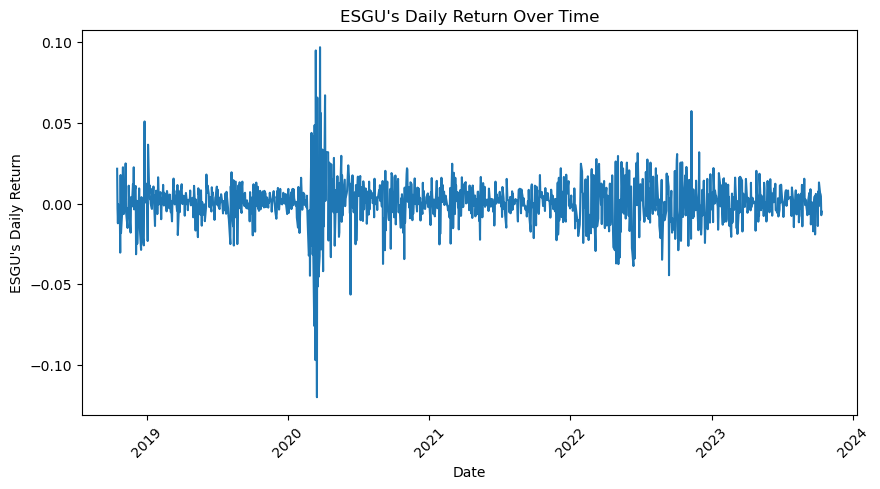

In [7]:
plt.figure(figsize = (10, 5))
plt.plot(df["Date"], df["ESGU Daily Return"], linestyle = "-")

plt.xlabel("Date")
plt.ylabel("ESGU's Daily Return")
plt.title("ESGU's Daily Return Over Time")

plt.xticks(rotation = 45)

plt.show()

By looking at the daily returns, we can see that most values are in the range of -0.025 to 0.025. The daily returns during 02/2020 and 03/2020 are outstanding, which reach as high as the absolute value of 0.1. Similar to intra price differences, the fluctuation rage of daily returns from 10/2018 to 10/2020 are relatively stable, while the fluctuation range increased to the range of -0.05 to 0.04 after 10/2020, and decreased back to the range of -0.02 to 0.02 after 01/2023. Thus, we may conclude that ESGU's daily returns have experienced relatively constant fluctuations with a few exceptions.

The mean of ESGU's daily returns over the 5 years is 0.0005
The median of ESGU's daily returns over the 5 years is 0.0008


<Figure size 1200x600 with 0 Axes>

<AxesSubplot:xlabel='ESGU Daily Return', ylabel='Count'>

Text(0.5, 1.0, "ESGU's Daily Returns")

Text(0.5, 0, 'Daily Return')

Text(0, 0.5, 'Frequency')

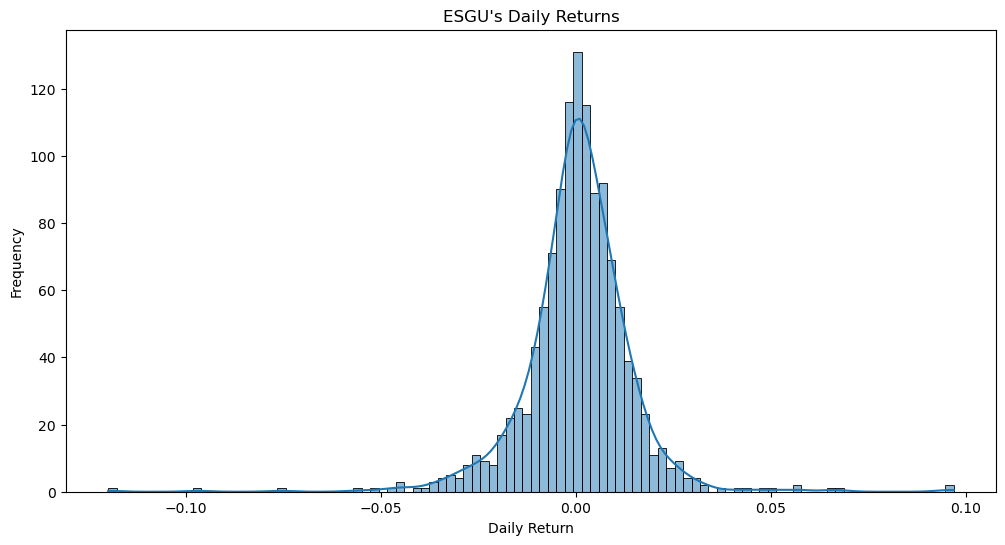

In [8]:
mean_daily_return = "{:.4f}".format(np.mean(df["ESGU Daily Return"].dropna()))
median_daily_return = "{:.4f}".format(np.median(df["ESGU Daily Return"].dropna()))
print("The mean of ESGU's daily returns over the 5 years is", mean_daily_return)
print("The median of ESGU's daily returns over the 5 years is", median_daily_return)

plt.figure(figsize = (12,6))
sns.histplot(df["ESGU Daily Return"], bins = 100, kde = True)
plt.title("ESGU's Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

By looking at the histogram of ESGU's daily returns, we can also see long tails on the two sides, which may include outliers during 02/2020 and 03/2020. Daily return values are mostly between -0.05 and 0.05 with both the mean and median being greater than 0. It indicates positive performance of ESGU and suggests that the stock, on average, has experienced positive returns on most trading days during the 5 years.

From the analysis of interday price difference and daily returns of ESGU, we may conclude that even though ESGU has a positive performance, it might not be a suitable option for investors who are focusing on short-term investment, especially trading on daily basis, since the certain fluctuations in daily returns may lead to investment losses.

### ESGU's Closing Price and Volume Traded

The heatmap at the beginning of EDA Phase 2 shows a relatively strong correlation between ESGU closing price and its trading volume over time. Thus, ESGU Close and ESGU Volume are pulled out to investigate the relationship between the two variables.

,Year,Mean ESGU Close,Mean ESGU Volume
0,2018,58.452887,2.609623e+04
1,2019,64.097036,5.842619e+04
2,2020,72.772413,6.391923e+05
3,2021,97.821245,9.617835e+05
4,2022,91.207901,1.210697e+06
5,2023,93.054106,7.923442e+05


<Figure size 800x300 with 0 Axes>

Text(0.5, 1.0, "Mean ESGU's Closing Price by Year")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mean Closing Price')

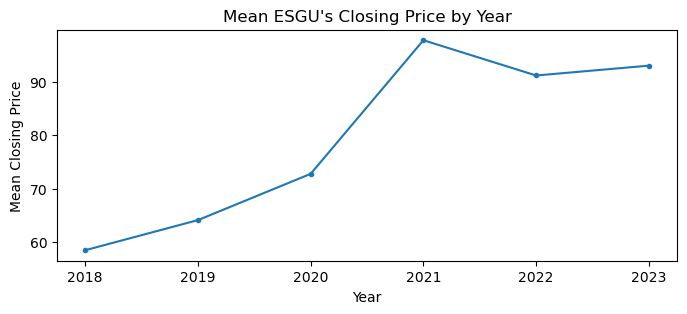

<Figure size 800x300 with 0 Axes>

Text(0.5, 1.0, "Mean ESGU's Volume by Year")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mean Volume')

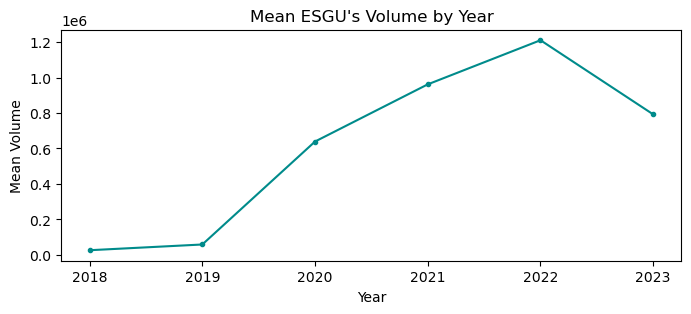

In [9]:
mean_close = df["ESGU Close"].groupby(df["Year"]).agg("mean")
mean_close_table = pd.DataFrame(mean_close).reset_index()
mean_close_table.columns = ["Year", "Mean ESGU Close"]

mean_volume = df["ESGU Volume"].groupby(df["Year"]).agg("mean")
mean_volume_table = pd.DataFrame(mean_volume).reset_index()
mean_volume_table.columns = ["Year", "Mean ESGU Volume"]

mean_table = pd.merge(mean_close_table, mean_volume_table, on = "Year")
mean_table

plt.figure(figsize = (8, 3))
plt.plot(mean_close, marker = ".")
plt.title("Mean ESGU's Closing Price by Year")
plt.xlabel("Year")
plt.ylabel("Mean Closing Price")
plt.show()

plt.figure(figsize = (8, 3))
plt.plot(mean_volume, marker = ".", color = "darkcyan")
plt.title("Mean ESGU's Volume by Year")
plt.xlabel("Year")
plt.ylabel("Mean Volume")
plt.show()

The mean closing price and the mean trading volume in each year are calculated to outline the respective movements in stock price and trading volume. Line plots are applied to visualize the movements. ESGU's closing price and its trading volume both follow a similar increasing trend from 2018 to 2021 on their mean values. However, the mean closing price decreased in 2022 and slightly increased in 2023 while the mean trading volume had opposite movements from 2021 to 2023. Therefore, ESGU's closing price might not be positively correlated with its trading volume.

The complete data of ESGU Close and ESGU Volume are used to look at their relationship in more detail.

<AxesSubplot:xlabel='Date', ylabel='ESGU Close'>

Text(0.5, 1.0, "ESGU's Closing Prices")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Closing Price')

<AxesSubplot:xlabel='Date', ylabel='ESGU Volume'>

Text(0.5, 1.0, "ESGU's Volume Traded")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Volume')

Text(0.5, 0.98, "ESGU's Closing Prices vs. Volume Traded")

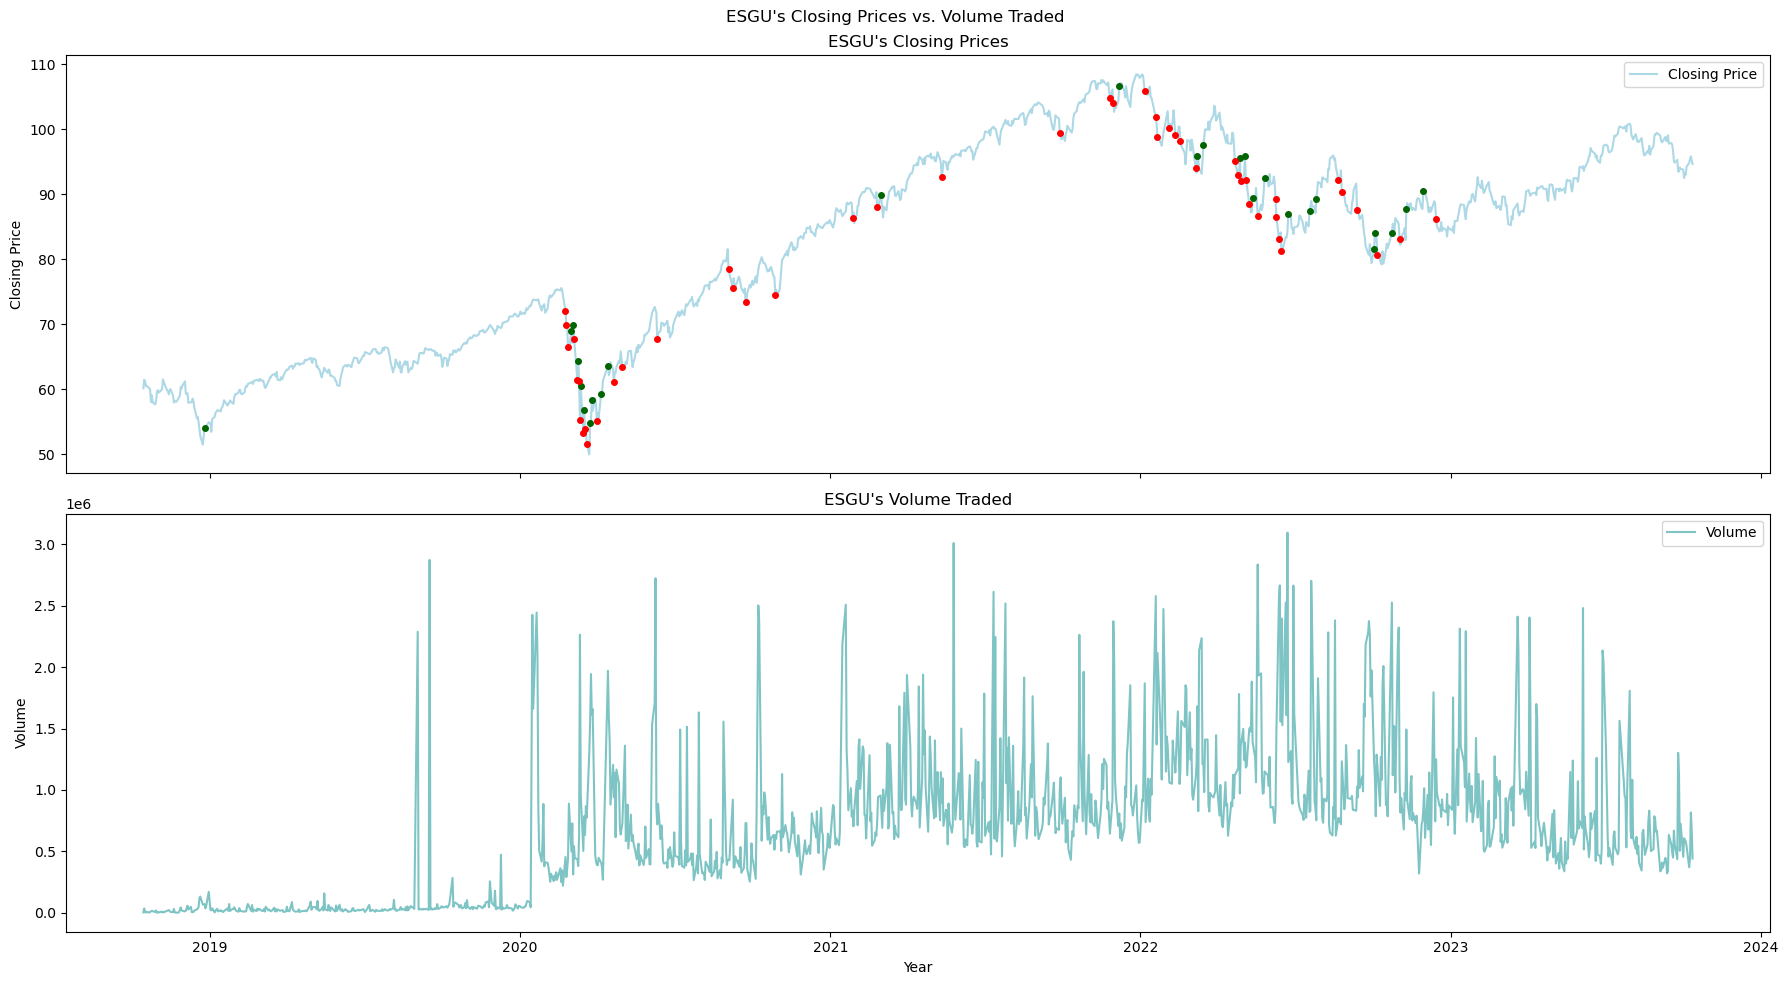

In [10]:
import warnings
# Filter out the specific warning
warnings.filterwarnings("ignore", message="color is redundantly defined by the 'color' keyword argument")

df["Price Difference"] = df["ESGU Close"].diff()
q1 = df["Price Difference"].quantile(0.25)
q3 = df["Price Difference"].quantile(0.75)

# Calculate the IQR (Interquartile Range)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (18, 10), sharex = True)

sns.lineplot(x = "Date", y = "ESGU Close", data = df, color = "lightblue", ax = ax1)
ax1.set_title("ESGU's Closing Prices")
ax1.set_xlabel("Year")
ax1.set_ylabel("Closing Price")
ax1.legend(["Closing Price"])

df_above_threshold = df[df["Price Difference"] > upper_bound]
ax1.plot(df_above_threshold["Date"], df_above_threshold["ESGU Close"], "ro", markersize = 4, label = "Price Pull-back", color = "darkgreen")
df_below_threshold = df[df["Price Difference"] < lower_bound]
ax1.plot(df_below_threshold["Date"], df_below_threshold["ESGU Close"], "ro", markersize = 4, label = "Price Drop", color = "r")

sns.lineplot(x = "Date", y = "ESGU Volume", data = df, color = "darkcyan", alpha = 0.5, ax = ax2)
ax2.set_title("ESGU's Volume Traded")
ax2.set_xlabel("Year")
ax2.set_ylabel("Volume")
ax2.legend(["Volume"])

fig.suptitle("ESGU's Closing Prices vs. Volume Traded")

plt.tight_layout()

plt.show()

The plot of ESGU's volume traded show that the volume traded was relatively stable from 10/2018 to 01/2020 with two sudden surges in 08/2019. The trading volume then continued to fluctuate after 01/2020.

The parallel plots are drawn intending to explore whether there is an unusually high volume when the market sentiment reverses. Red dots in the upper plot represent days with a sharp price drop beyond the lower bound calculated by 1.5 * IQR and green dots represent days with a sharp pull-back beyond the upper bound. The two plots show that most of the days represented by the red or green dots have a surge in trading volume. Therefore, we can infer that volume traded would be unusually high during market sentiment reverses. However, we cannot take the high volume as a signal of a change in market sentiment, as there are still plenty of volume surges that occur on days when the closing price does not change significantly.

## Summary

- The upward trend of ESGU's closing price and similar results compared to the benchmark indicate that ESGU has been performing positively over the past 5 years. Investors are optimistic about the companies implementing ESG and believe that ESG investment prospects are promising.

- ESGU is not a suitable option for investors seeking fast profits, as its daily returns fluctuate constantly over time, which may lead to a number of short-term investment losses.

- There is an unusually high ESGU's trading volume when the market sentiment reverses. However, unusually high trading volumes cannot signal a change in market sentiment.

### Difficulties

One difficulty I faced in this analysis is that the ESGU data is relatively organized, which could be a positive starting point but may also bring negative impacts on data quality by underestimating the need of data cleaning. To ensure the reliability of the analysis, I decided to approach the analysis with a more critical mindset and conduct a complete set of data cleansing process, including editing the format of data and checking for missing values and outliers, to better prepare a well-organized data for the exploratory data analysis. 

I also have difficulties related to scope as I considered adding in S&P 500 index data for exploring and assessing how the ESGU performs relative to the broader market during the analysis. However, analysis on historical price data, returns data and benchmark data are only parts of the aspects that are required to perform a risk analysis on investing in an ETF like ESGU. Other key components include epense ratio information, which can reflect the costs associated with managing the fund, data on tracking error, which could measure how closely ESGU's performance tracks its underlying index, and detailed data on ESGU's portfolio holdings, including sector allocation and individual stock weights. The limited data availability make it difficult to conduct a comprehensive risk analysis for investment decision on ESGU.

### Conclusion

Based on ESGU's price growth momentum and increasing investor confidence in ESG practices, ESGU could be a good long-term investment option. However, it may not be a suitable option for short-term investments, especially for investors who prefer to hold short positions in stocks. In addition to focusing the emerging ESG sector, it is also essential to assess market sentiments when deciding to invest in ESGU, as ESGU's price movements are in line with trends in overall market conditions. More importantly, a more comprehensive risk analysis should be conducted to develop a more personalized investment strategy that can align with investors' individual financial objectives and risk tolerance.

### Possible Steps in the Future

To further assess more details about the historical performance of ESGU, the following aspects can be considered in next steps. 

- Risk Assessment
The risk associated with ESGU can be evaluated through analyzing its historical volatility. Metrics such as standard deviation can be applied to quantify and compare investment risks of ESGU relative to the broader market.

- Event Analysis
I studied the systematic investment risk with the impact of market sentiment on ESGU's closing prices over time through the comparison between the closing price trend of ESGU and the trend of the S&P 500 index in this analysis. In next steps, we could identify and analyze major events or news releases related to ESG issues and policy changes to further learn about the influence of unsystematic risks on the volitality of ESGU's closing price.

A machine learning model, including regression analysis and time-series forecasting, can also be considered to provide predictive insights into future trends of ESGU's stock price based on historical data.